In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

win_rate = ctrl.Antecedent(np.arange(0, 101, 1), 'win_rate')
pick_rate = ctrl.Antecedent(np.arange(0, 101, 1), 'pick_rate')
power_level  = ctrl.Consequent(np.arange(0, 5, 1), 'power_level')

win_rate["L"] = fuzz.trapmf(win_rate.universe, [0, 0, 45, 53])
win_rate["ML"] = fuzz.trimf(win_rate.universe, [45, 53, 55])
win_rate["M"] = fuzz.trimf(win_rate.universe, [53, 55, 57])
win_rate["MH"] = fuzz.trimf(win_rate.universe, [55, 57, 59])
win_rate["H"] = fuzz.trapmf(win_rate.universe, [57, 59, 100, 100]) 

pick_rate["L"] = fuzz.trapmf(pick_rate.universe, [0, 0, 40, 50])
pick_rate["ML"] = fuzz.trimf(pick_rate.universe, [40, 50, 70])
pick_rate["M"] = fuzz.trimf(pick_rate.universe, [50, 70, 80])
pick_rate["MH"] = fuzz.trimf(pick_rate.universe, [70, 80, 85])
pick_rate["H"] = fuzz.trapmf(pick_rate.universe, [80, 85, 100, 100])

power_level["L"] = fuzz.trimf(power_level.universe, [0, 0, 1])
power_level["ML"] = fuzz.trimf(power_level.universe, [0, 1, 2])
power_level["M"] = fuzz.trimf(power_level.universe, [1, 2, 3])
power_level["MH"] = fuzz.trimf(power_level.universe, [2, 3, 4])
power_level["H"] = fuzz.trimf(power_level.universe, [3, 4, 4])

c:\Users\xxran\Desktop\Dev\MTGAgent\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


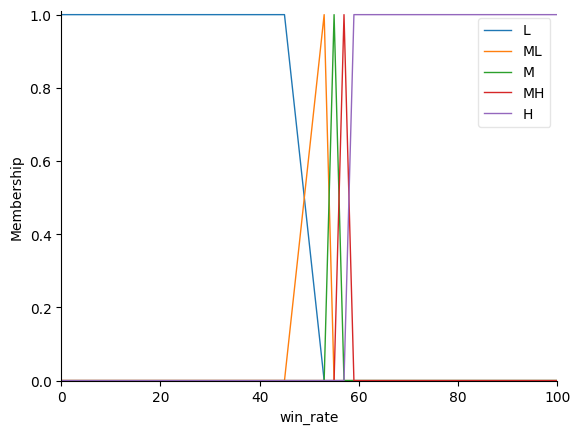

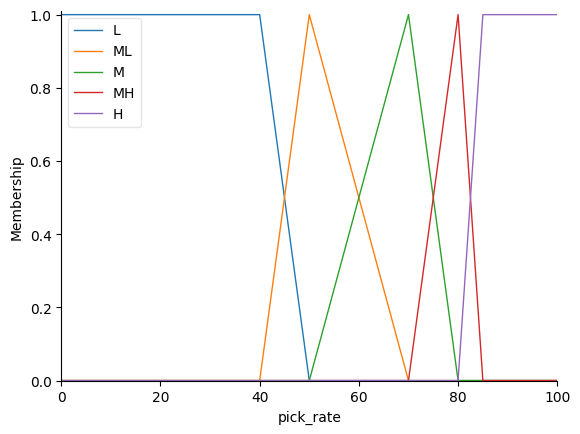

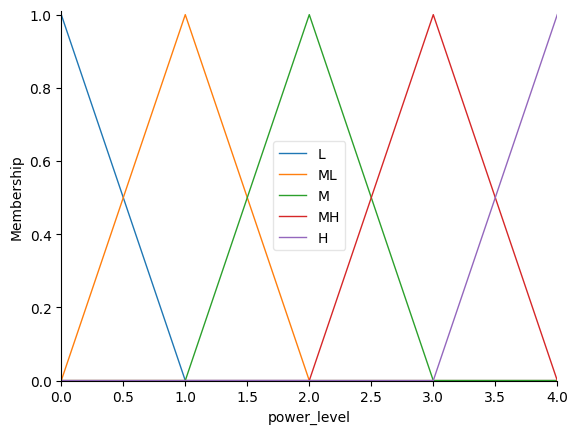

In [2]:
win_rate.view()
pick_rate.view()
power_level.view()

In [3]:
rule1 = ctrl.Rule(win_rate['L'] & pick_rate['L'], power_level['L'])
rule2 = ctrl.Rule(win_rate['L'] & pick_rate['ML'], power_level['L'])
rule3 = ctrl.Rule(win_rate['L'] & pick_rate['M'], power_level['L'])
rule4 = ctrl.Rule(win_rate['L'] & pick_rate['MH'], power_level['L'])
rule5 = ctrl.Rule(win_rate['L'] & pick_rate['H'], power_level['L'])

rule6 = ctrl.Rule(win_rate['ML'] & pick_rate['L'], power_level['L'])
rule7 = ctrl.Rule(win_rate['ML'] & pick_rate['ML'], power_level['L'])
rule8 = ctrl.Rule(win_rate['ML'] & pick_rate['M'], power_level['L'])
rule9 = ctrl.Rule(win_rate['ML'] & pick_rate['MH'], power_level['ML'])
rule10 = ctrl.Rule(win_rate['ML'] & pick_rate['H'], power_level['ML'])

rule11 = ctrl.Rule(win_rate['M'] & pick_rate['L'], power_level['ML'])
rule12 = ctrl.Rule(win_rate['M'] & pick_rate['ML'], power_level['ML'])
rule13 = ctrl.Rule(win_rate['M'] & pick_rate['M'], power_level['M'])
rule14 = ctrl.Rule(win_rate['M'] & pick_rate['MH'], power_level['M'])
rule15 = ctrl.Rule(win_rate['M'] & pick_rate['H'], power_level['M'])

rule16 = ctrl.Rule(win_rate['MH'] & pick_rate['L'], power_level['L'])
rule17 = ctrl.Rule(win_rate['MH'] & pick_rate['ML'], power_level['L'])
rule18 = ctrl.Rule(win_rate['MH'] & pick_rate['M'], power_level['M'])
rule19 = ctrl.Rule(win_rate['MH'] & pick_rate['MH'], power_level['MH'])
rule20 = ctrl.Rule(win_rate['MH'] & pick_rate['H'], power_level['MH'])

rule21 = ctrl.Rule(win_rate['H'] & pick_rate['L'], power_level['M'])
rule22 = ctrl.Rule(win_rate['H'] & pick_rate['ML'], power_level['MH'])
rule23 = ctrl.Rule(win_rate['H'] & pick_rate['M'], power_level['H'])
rule24 = ctrl.Rule(win_rate['H'] & pick_rate['MH'], power_level['H'])
rule25 = ctrl.Rule(win_rate['H'] & pick_rate['H'], power_level['H'])

In [4]:
power_level_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, 
                                       rule6, rule7, rule8, rule9, rule10,
                                       rule11, rule12, rule13, rule14, rule15, 
                                       rule16, rule17, rule18, rule19, rule20, 
                                       rule21, rule22, rule23, rule24, rule25])

power_level_sim = ctrl.ControlSystemSimulation(power_level_ctrl)

In [5]:
power_level_sim.input['win_rate'] = 57.0
power_level_sim.input['pick_rate'] =80.0

power_level_sim.compute()

3
3.0


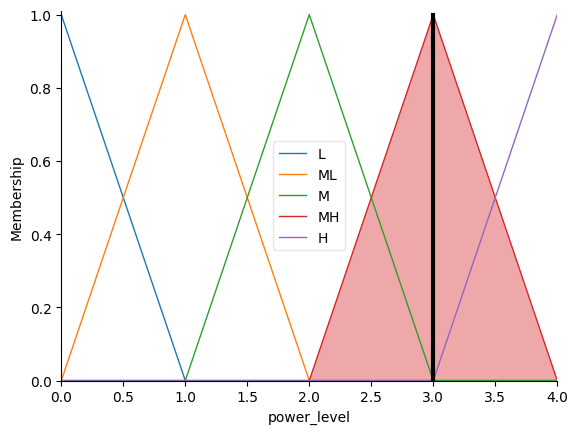

In [6]:
import math
def custom_round(number):
    # Check if the decimal part is exactly 0.5
    if number - int(number) == 0.5:
        return math.ceil(number)
    else:
        return round(number)

print(custom_round(power_level_sim.output['power_level']))
print(power_level_sim.output['power_level'])
power_level.view(sim=power_level_sim)

In [7]:
import pandas as pd

csv_files = [
    'CardData/AFR.csv', 'CardData/AKR.csv', 'CardData/BRO.csv', 'CardData/CORE.csv', 'CardData/DBL.csv', 
    'CardData/DMU.csv', 'CardData/DOM.csv', 'CardData/ELD.csv', 'CardData/IKO.csv',
    'CardData/KHM.csv', 'CardData/KLR.csv', 'CardData/KTK.csv', 'CardData/LCI.csv', 'CardData/LTR.csv', 
    'CardData/MAT.csv', 'CardData/MID.csv', 'CardData/MOM.csv', 'CardData/NEO.csv',
    'CardData/ONE.csv', 'CardData/RAVM.csv', 'CardData/RIX.csv', 'CardData/SIR.csv', 'CardData/SNC.csv', 
    'CardData/STX.csv', 'CardData/THB.csv', 'CardData/VOW.csv', 'CardData/WOE.csv',
]

df_list = []

for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

#combined_df.to_csv('CardData/CombinedSets.csv', index=False)

In [8]:
import pandas as pd

df = pd.read_csv('CardData/CombinedSets.csv')

df.replace('null', pd.NA, inplace=True)

cleaned_df = df.dropna(subset=['GP WR', '% GP'], inplace=True)

cleaned_df = df.drop_duplicates(subset=['Name'], inplace=True)

#df.to_csv('CardData/CleanedCombinedSets.csv', index=False)

In [9]:

df['% GP'] = df['% GP'].str.rstrip('%').astype('float')
df['GP WR'] = df['GP WR'].str.rstrip('%').astype('float')

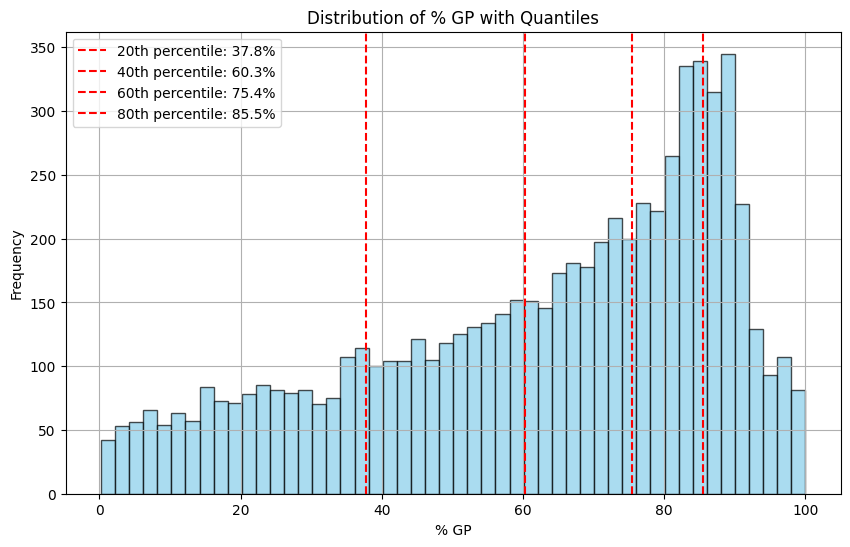

In [10]:
import matplotlib.pyplot as plt
quantiles = df['% GP'].quantile([0.20, 0.40, 0.60, 0.80]).to_dict()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(df['% GP'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of % GP with Quantiles')
plt.xlabel('% GP')
plt.ylabel('Frequency')
plt.grid(True)

# Add quantile lines
for quantile, value in quantiles.items():
    plt.axvline(x=value, color='r', linestyle='--', label=f'{int(quantile * 100)}th percentile: {value}%')

plt.legend()
plt.show()

In [11]:
def calculate_power_level(wr, pr): 
    power_level_sim.input['win_rate'] = wr
    power_level_sim.input['pick_rate'] = pr 
    power_level_sim.compute()
    return custom_round(power_level_sim.output['power_level'])

print(calculate_power_level(50.3, 60.3))
df['power_level'] = df.apply(lambda row: calculate_power_level(row['GP WR'], row['% GP']), axis=1)
df.to_csv('CardData/CleanedCombinedSetsPowerLevel.csv', index=False)


0
